**Problem Statement**

This data set addresses a control problem, namely flying a F16 aircraft. The attributes describe the
status of the airplane, while the goal is to predict the control action on the ailerons of the aircraft.

**Accuracy Measure**

Root Mean Squared Error

In [1]:
import pandas as pd
from pandas import datetime
import numpy as np
import pickle
#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
import seaborn as sns
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.manifold import TSNE
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from prettytable import PrettyTable
import time
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ailerons_train.csv to ailerons_train.csv


In [3]:
data = pd.read_csv('ailerons_train.csv')

In [4]:
data.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,diffSeTime1,diffSeTime2,diffSeTime3,diffSeTime4,diffSeTime5,diffSeTime6,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

In [ ]:
data.isna().sum()

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

## EDA

In [5]:
data['goal'].nunique()

34

In [6]:
data.drop_duplicates()
data.shape

(12250, 41)

In [7]:
data.describe()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,diffSeTime1,diffSeTime2,diffSeTime3,diffSeTime4,diffSeTime5,diffSeTime6,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,12250.000000,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,12250.000000,12250.000000
mean,-9.362939,-12.632408,0.006878,0.061144,0.626213,0.067045,-11.068816,-0.919592,-0.000970,-0.053698,0.021841,0.021855,0.021855,0.021865,0.021865,0.021880,0.021881,0.021901,0.021900,0.021921,0.021922,0.021936,0.021937,0.021949,-0.000132,0.000000,-0.000056,-1.632653e-07,-0.000072,-7.346939e-07,-0.000089,0.000000,-0.000103,-5.714286e-07,-0.000100,-6.530612e-07,-0.000096,-3.265306e-07,0.622106,0.021949,-0.000871
std,259.502687,25.727234,0.305488,0.118447,0.312061,0.969050,4.094653,10.405533,0.013352,1.121631,0.006828,0.006856,0.006856,0.006861,0.006861,0.006871,0.006871,0.006878,0.006878,0.006891,0.006892,0.006906,0.006907,0.006912,0.000696,0.000013,0.000452,2.857213e-05,0.000482,4.517126e-05,0.000562,0.000013,0.000621,8.806480e-05,0.000644,5.569441e-05,0.000617,3.129801e-05,0.195486,0.006912,0.000404
min,-975.000000,-99.000000,-1.530000,-0.540000,-0.420000,-3.100000,-23.000000,-43.000000,-0.099000,-8.800000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,-0.005000,-0.001000,-0.006000,-2.000000e-03,-0.008000,-4.000000e-03,-0.005000,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,0.400000,0.012000,-0.003600
25%,-176.000000,-29.000000,-0.220000,-0.020000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.018000,-0.001100
50%,-20.000000,-13.000000,0.020000,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,0.020000,-0.000800
75%,159.000000,3.000000,0.230000,0.130000,0.800000,0.700000,-8.000000,6.000000,0.008000,0.200000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.700000,0.023000,-0.000600
max,977.000000,94.000000,1.060000,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,11.200000,0.078000,0.078000,0.078000,0.078000,0.078000,0.078000,0.078000,0.076000,0.076000,0.074000,0.074000,0.074000,0.074000,0.073000,0.004000,0.001000,0.004000,2.000000e-03,0.003000,0.000000e+00,0.004000,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,2.000000,0.073000,-0.000200


Above table shows how features are distributed in dataset.

Feature contain both negative and positive values

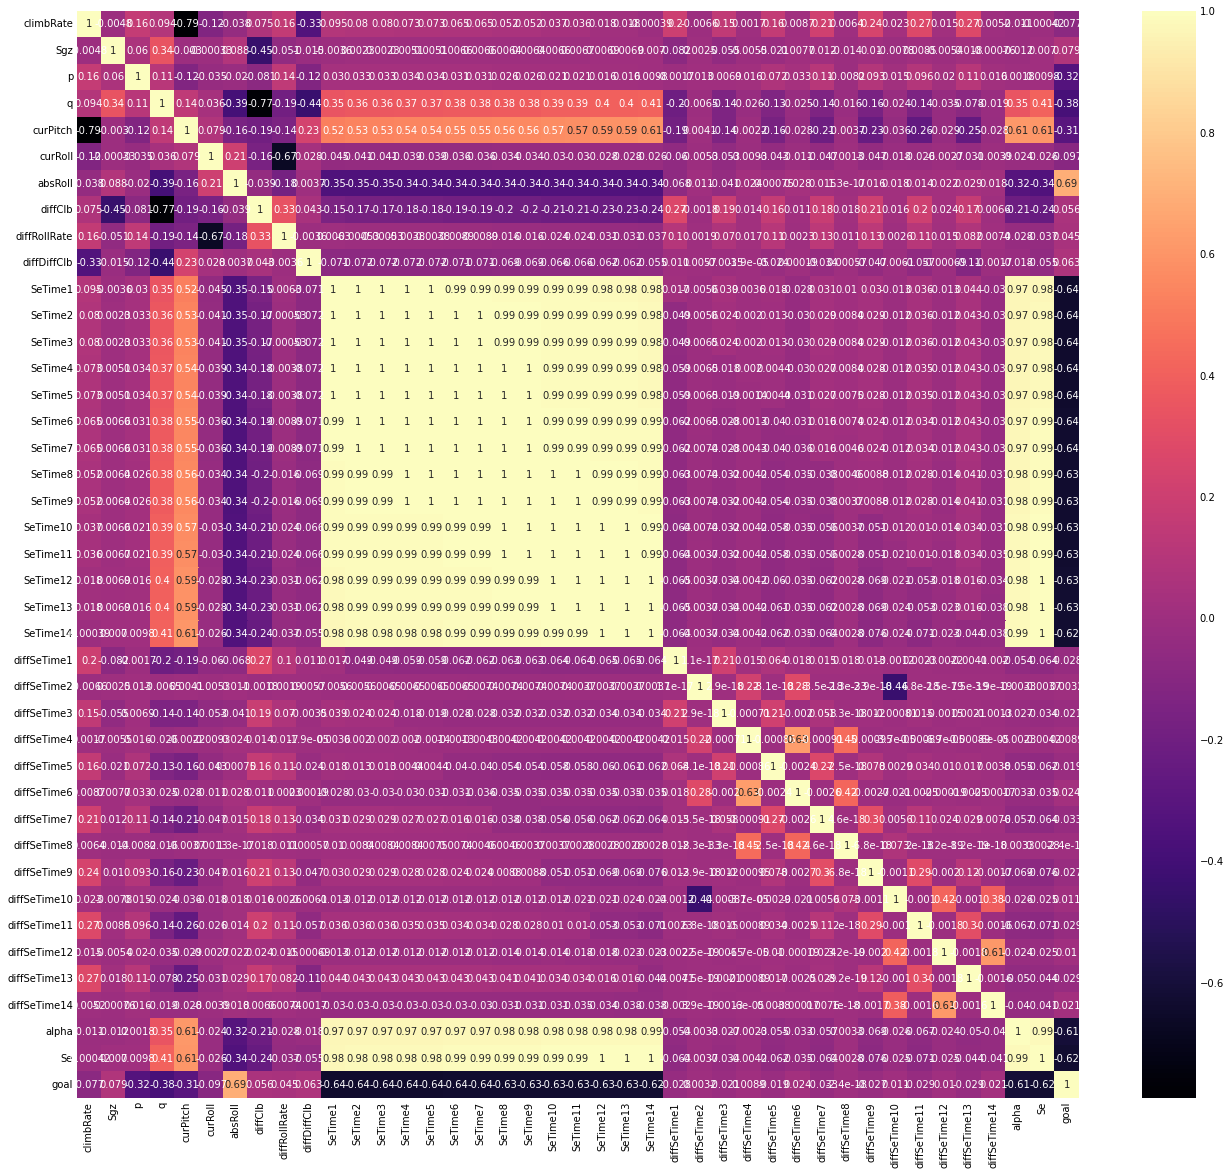

In [8]:
fig, ax = plt.subplots(figsize=(20,20))     
sns.heatmap(data.corr(),annot=True,cmap='magma')

Above plot is a correlation matrix which shows realationship between the feature

As there are lots of feature we got very complicated plot but we can see 

there is high correlation between feature Alpha and Se

similarly Alpha and Se is highly correlated with all 14 SeTime

Also all 14 SeTime are highly correlated with each other

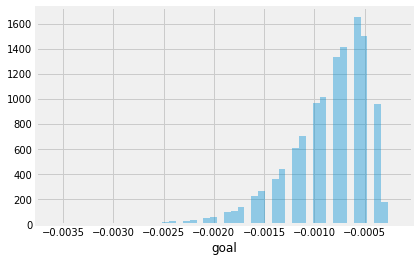

In [9]:
sns.distplot(data['goal'],kde=False)

Above plot shows the distribution of goal

As value for goal is increasing count also increasing

**Univarient** **analysis**

In [10]:
def univarient_analysis(col):
  print("Number of null values:",data[col].isna().sum())
  print('##############################################')
  print("Number of unique values:",data[col].nunique())
  print('##############################################')
  sns.boxplot(y=col, data =data)
  plt.show()  
  print('##################################################################')

Above function will find is there any null value

get count of all unique values in feature and give boxplot of feature

Number of null values: 0
##############################################
Number of unique values: 1383
##############################################


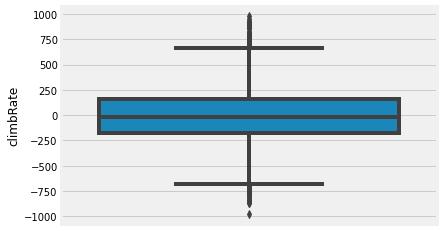

##################################################################
Number of null values: 0
##############################################
Number of unique values: 182
##############################################


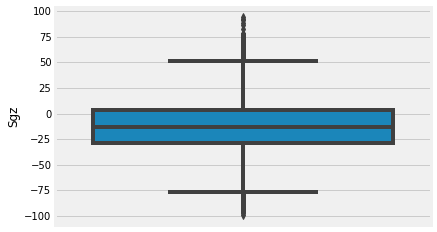

##################################################################
Number of null values: 0
##############################################
Number of unique values: 193
##############################################


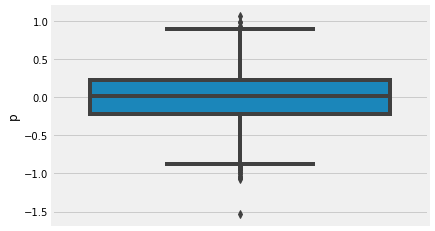

##################################################################
Number of null values: 0
##############################################
Number of unique values: 99
##############################################


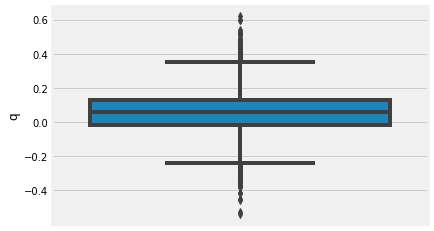

##################################################################
Number of null values: 0
##############################################
Number of unique values: 230
##############################################


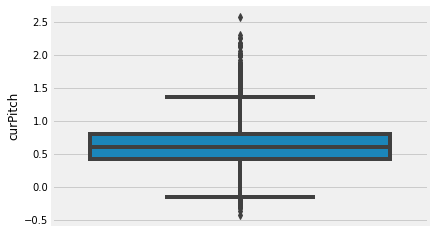

##################################################################
Number of null values: 0
##############################################
Number of unique values: 61
##############################################


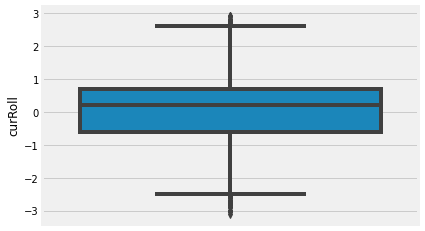

##################################################################
Number of null values: 0
##############################################
Number of unique values: 21
##############################################


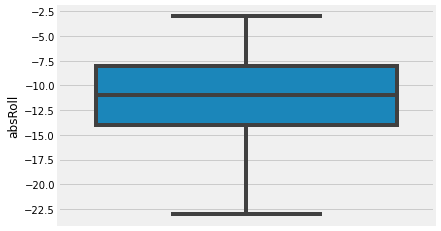

##################################################################
Number of null values: 0
##############################################
Number of unique values: 85
##############################################


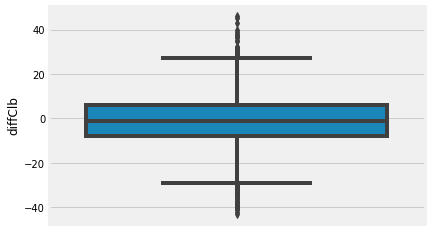

##################################################################
Number of null values: 0
##############################################
Number of unique values: 117
##############################################


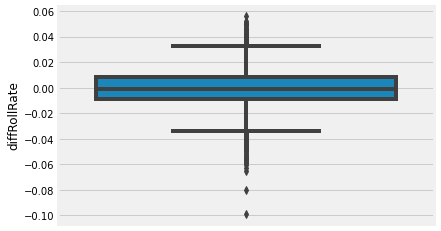

##################################################################
Number of null values: 0
##############################################
Number of unique values: 140
##############################################


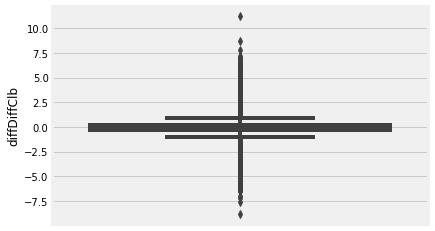

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


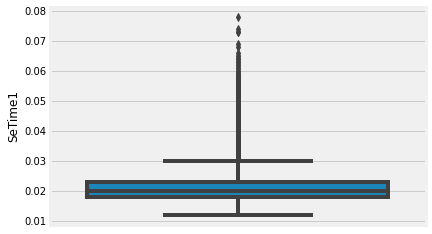

##################################################################
Number of null values: 0
##############################################
Number of unique values: 61
##############################################


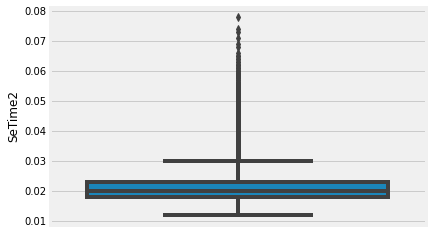

##################################################################
Number of null values: 0
##############################################
Number of unique values: 61
##############################################


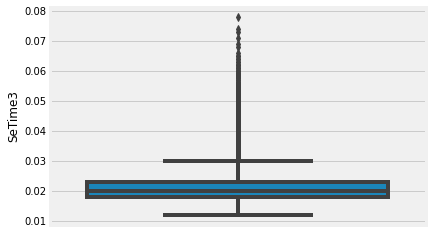

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


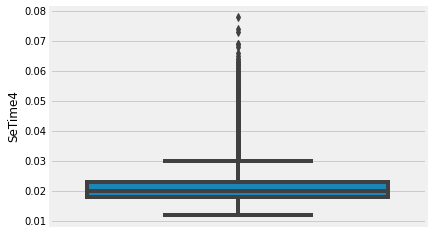

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


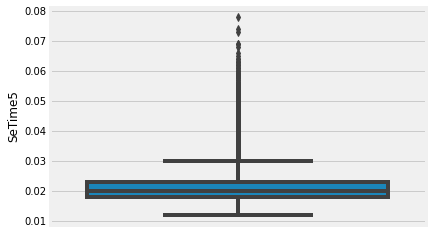

##################################################################
Number of null values: 0
##############################################
Number of unique values: 61
##############################################


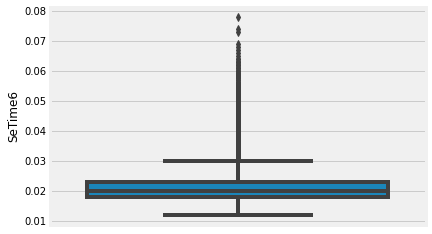

##################################################################
Number of null values: 0
##############################################
Number of unique values: 61
##############################################


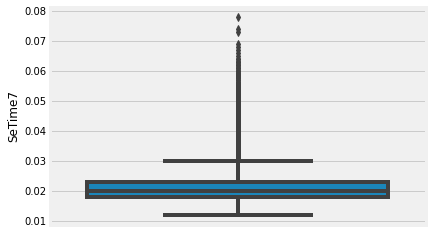

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


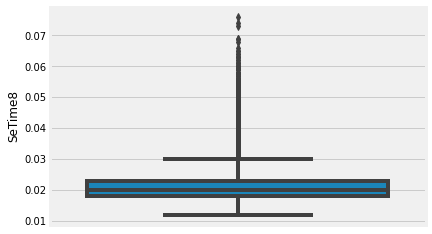

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


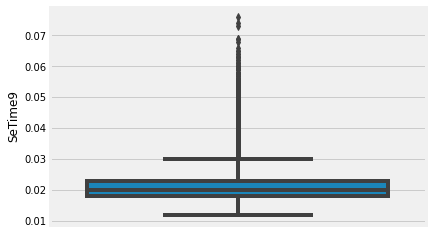

##################################################################
Number of null values: 0
##############################################
Number of unique values: 59
##############################################


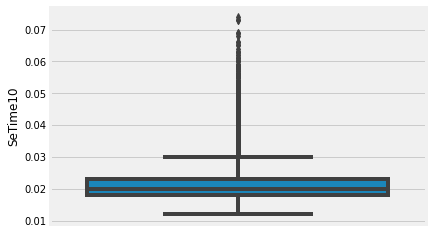

##################################################################
Number of null values: 0
##############################################
Number of unique values: 59
##############################################


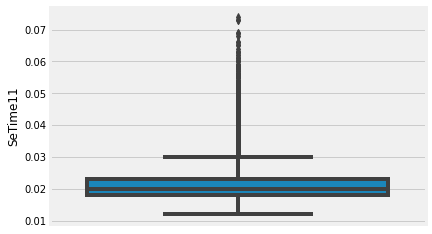

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


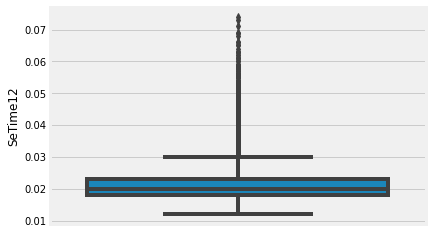

##################################################################
Number of null values: 0
##############################################
Number of unique values: 60
##############################################


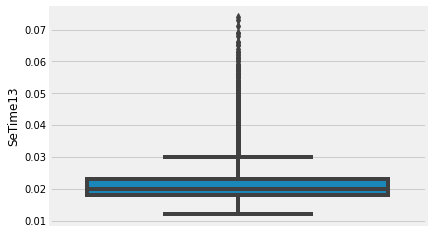

##################################################################
Number of null values: 0
##############################################
Number of unique values: 58
##############################################


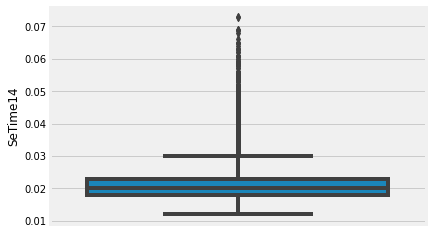

##################################################################
Number of null values: 0
##############################################
Number of unique values: 10
##############################################


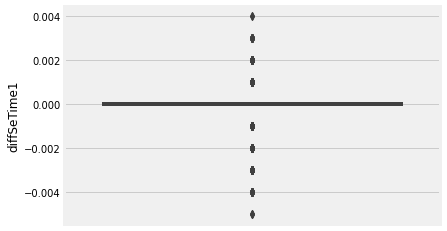

##################################################################
Number of null values: 0
##############################################
Number of unique values: 3
##############################################


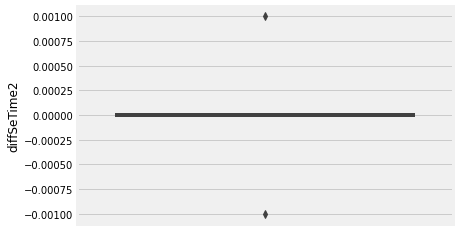

##################################################################
Number of null values: 0
##############################################
Number of unique values: 10
##############################################


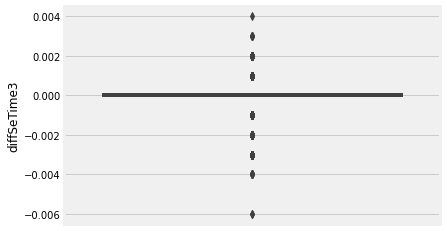

##################################################################
Number of null values: 0
##############################################
Number of unique values: 4
##############################################


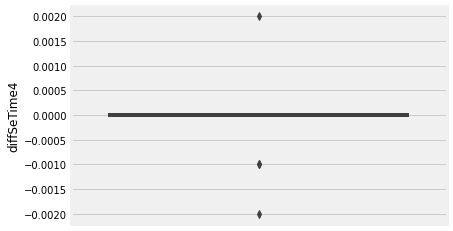

##################################################################
Number of null values: 0
##############################################
Number of unique values: 10
##############################################


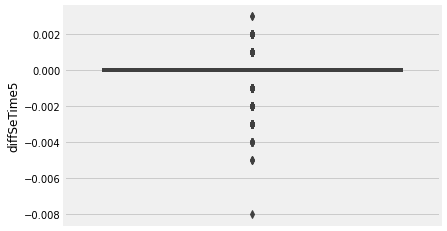

##################################################################
Number of null values: 0
##############################################
Number of unique values: 4
##############################################


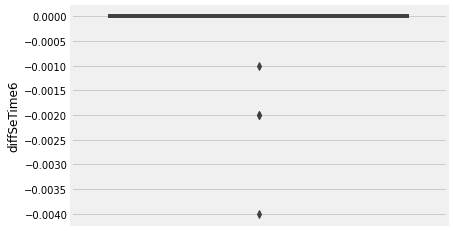

##################################################################
Number of null values: 0
##############################################
Number of unique values: 10
##############################################


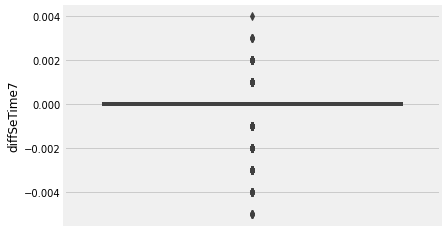

##################################################################
Number of null values: 0
##############################################
Number of unique values: 3
##############################################


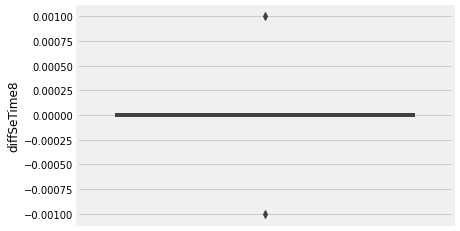

##################################################################
Number of null values: 0
##############################################
Number of unique values: 10
##############################################


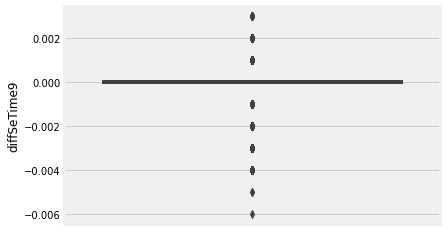

##################################################################
Number of null values: 0
##############################################
Number of unique values: 7
##############################################


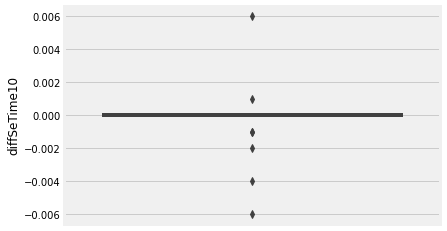

##################################################################
Number of null values: 0
##############################################
Number of unique values: 12
##############################################


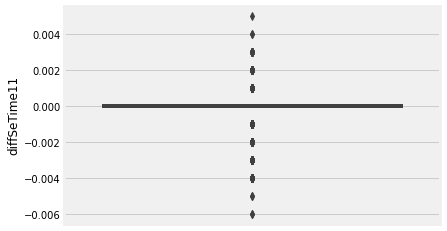

##################################################################
Number of null values: 0
##############################################
Number of unique values: 4
##############################################


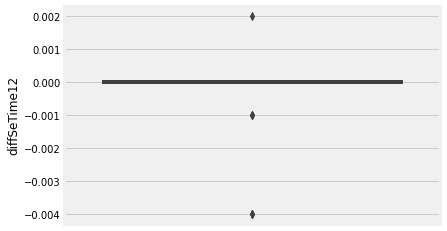

##################################################################
Number of null values: 0
##############################################
Number of unique values: 13
##############################################


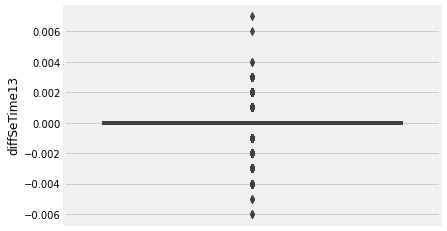

##################################################################
Number of null values: 0
##############################################
Number of unique values: 4
##############################################


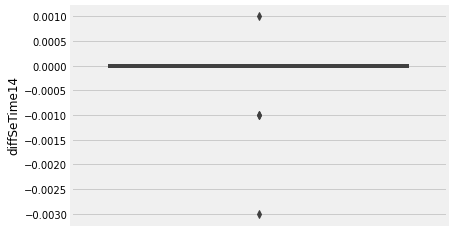

##################################################################
Number of null values: 0
##############################################
Number of unique values: 17
##############################################


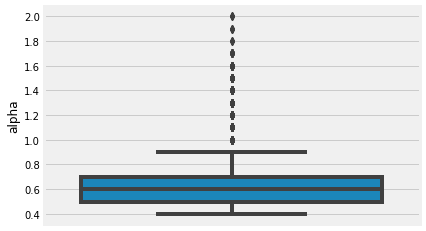

##################################################################
Number of null values: 0
##############################################
Number of unique values: 58
##############################################


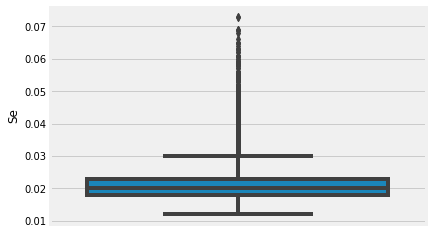

##################################################################
Number of null values: 0
##############################################
Number of unique values: 34
##############################################


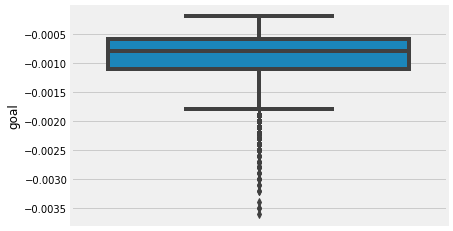

##################################################################


In [11]:
for col in data.columns:
  univarient_analysis(col)

From all above observation we can say there is no null value, there is no outlier that can cause big trouble

**PCA**

In [12]:
X = data.drop(['goal'],axis=1)

In [13]:
y = data['goal']

In [14]:
pca = decomposition.PCA()

In [15]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

print('#########################################################')

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



shape of pca_reduced.shape =  (12250, 2)
#########################################################
Explained variation per principal component: [0.98842647 0.01007993]


From the above output, you can observe that the principal component 1 holds 98.8% of the information while the principal component 2 holds only 1% of the information. Also, the other point to note is that while projecting 40-dimensional data to a two-dimensional data, 0.14% information was lost.
That means after reducing 40 dimention into 2 dimension we can still hold appx 99.8% of infomation which is great

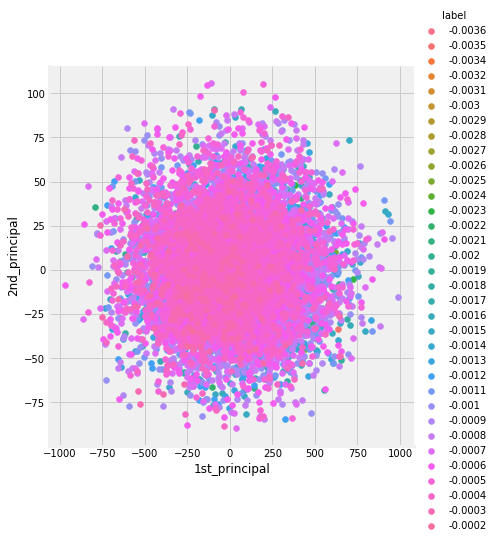

In [16]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Even after PCA data is highly mixed up there are very small small clusters out there. It is almost impossible to linearly seperate those point. 

And it is quite obious too becouse there are total  36 uniques value of goal in our dataset

**TSNE**

Let try to plot with the help of TSNE to check if we get better result that PCA

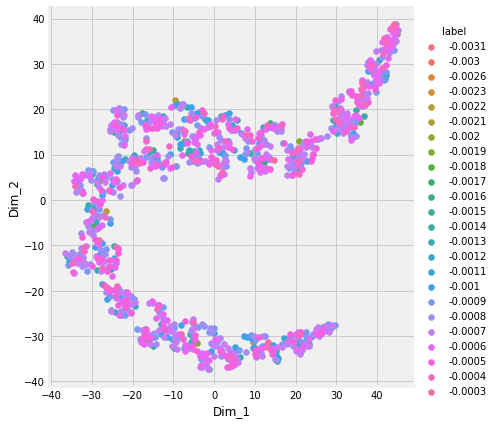

In [17]:


# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = X[0:1000]
labels_1000 = y[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

So  here also we are not getting any clear visualization of data 

let visualize how other features values effecting goal values

here we plot only those feature whose unique value are less than 20 because if unique value are greater we cannot collect information from graph as there is lots of overlap.

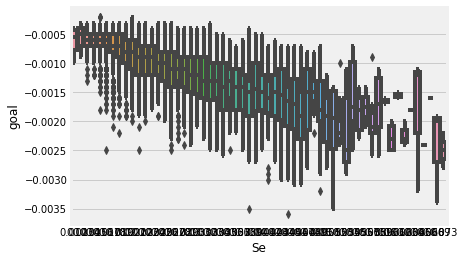

In [18]:
sns.boxplot(data['Se'] , 'goal', data=data)
plt.show()

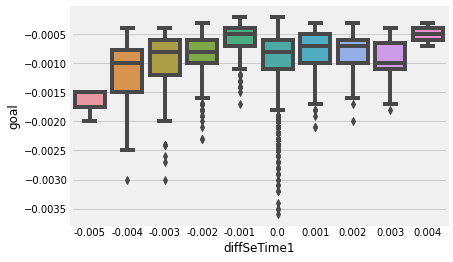

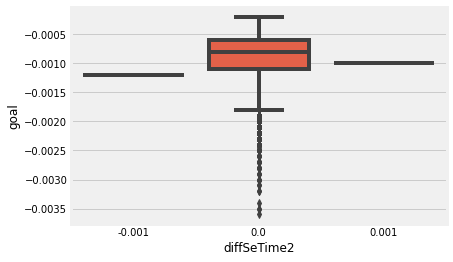

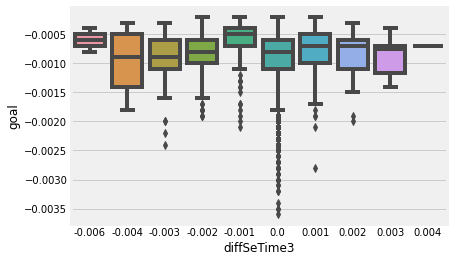

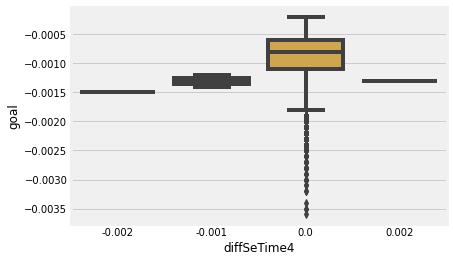

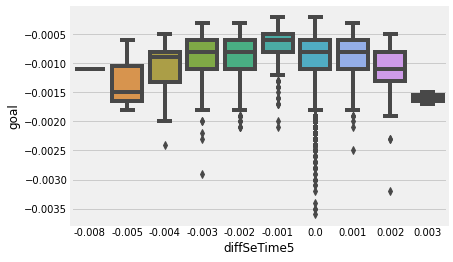

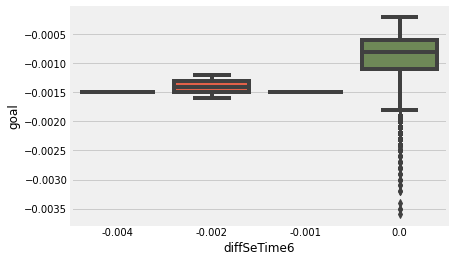

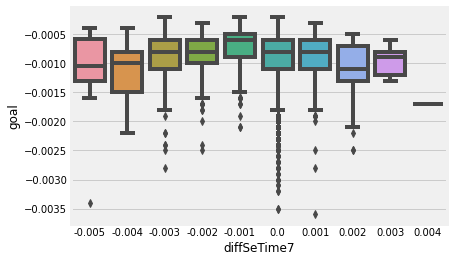

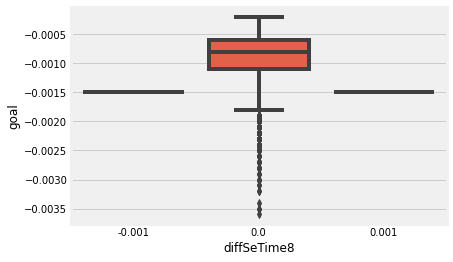

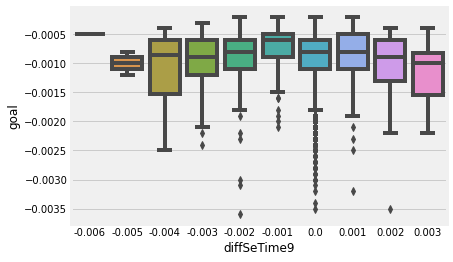

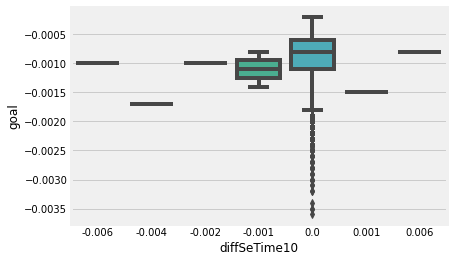

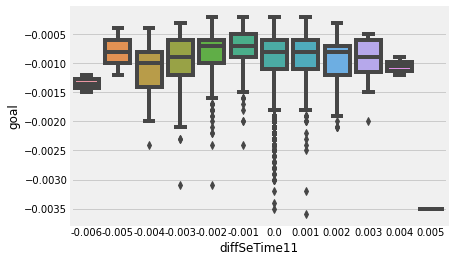

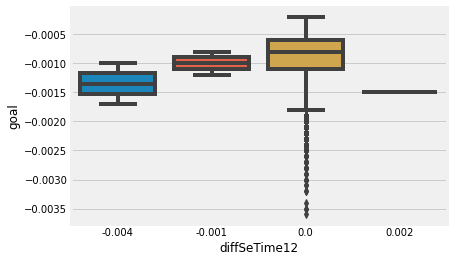

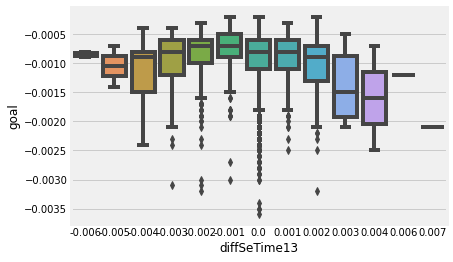

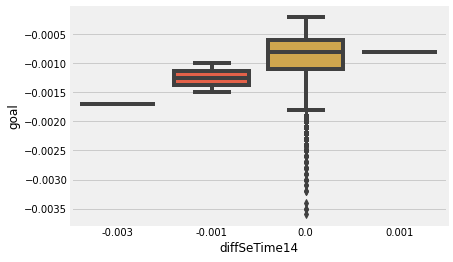

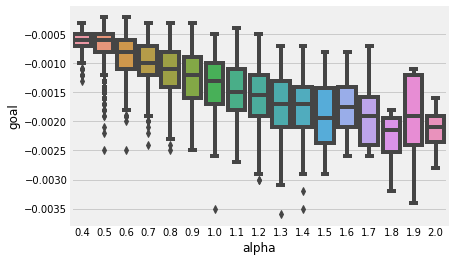

In [19]:
for col in data.columns:
  if data[col].nunique()<20 and col!='goal':
    sns.boxplot(data[col] , 'goal', data=data)
    plt.show()

## Splitting data

For this we will solit data into train test and cv 

In [20]:
X = data.drop(['goal'],axis=1)
y = data['goal']

In [21]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.33)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33)

In [22]:
print('Train data shape: X=',(X_train.shape),'y=',(y_train.shape))
print('CV data shape: X=',(X_cv.shape),'y=',(y_cv.shape))
print('Test data shape: X=',(X_test.shape)," y=",(y_test.shape))


Train data shape: X= (5498, 40) y= (5498,)
CV data shape: X= (2709, 40) y= (2709,)
Test data shape: X= (4043, 40)  y= (4043,)


## Models

We will use Randomforest and Xgboost for this assigment

### XgBoost

In [23]:
#Best Parameters
param_dist = {
        'min_child_weight': [1, 5, 10,15,20],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :[10,50,100,250],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,9,11,15,20,35,50,70],
        'eval_metric': ['rmse'],
          }


reg = xgb.XGBRegressor()


xg_random = RandomizedSearchCV(reg, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='neg_mean_squared_error',random_state=25)

xg_random.fit(X_train,y_train)

start = time.time()
xg_random.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), 5))


[08:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [24]:
best_regressor = xg_random.best_estimator_

In [25]:
best_regressor

XGBRegressor(colsample_bytree=0.8, eval_metric='rmse', gamma=2, max_depth=50,
             min_child_weight=20, subsample=0.6)

In [26]:

# Get predictions
y_pred = best_regressor.predict(X_cv)

In [27]:
rmse_pred = mean_absolute_error(y_cv, y_pred) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 0.017615400618905017


In [28]:
y_test_pred = best_regressor.predict(X_test)

In [29]:
rmse_pred = mean_absolute_error(y_test, y_test_pred) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 0.01762973735305814


In [30]:
filename = 'Ailerons_XGB_model'
pickle.dump(best_regressor, open(filename, 'wb'))

### Random Forest

In [31]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



reg_rf = xgb.XGBRegressor()


rf_random = RandomizedSearchCV(reg_rf, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='neg_mean_squared_error',random_state=25)

rf_random.fit(X_train,y_train)

start = time.time()
rf_random.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), 5))


[08:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [39]:
best_regressor_rf = rf_random.best_estimator_

In [40]:
best_regressor_rf

XGBRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
             min_samples_split=5, n_estimators=700)

In [41]:


# Get predictions
y_pred = best_regressor_rf.predict(X_cv)

In [42]:
rmse_pred = mean_absolute_error(y_cv, y_pred) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 0.011254368662884939


In [43]:
y_test_pred = best_regressor_rf.predict(X_test)

In [44]:
rmse_pred = mean_absolute_error(y_test, y_test_pred) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 0.011188619147758516


In [38]:
filename = 'Ailerons_RF_model'
pickle.dump(best_regressor_rf, open(filename, 'wb'))

## Model Comparision

In [ ]:

x = PrettyTable()

x.field_names = ["Model", "CV RMSE","Test RMSE"]


x.add_row(["XgBoost Regressor", "0.0175", "0.0174"])
x.add_row(["RandomForest Regressor", "0.01123", "0.01122"])



print(x)

+------------------------+---------+-----------+
|         Model          | CV RMSE | Test RMSE |
+------------------------+---------+-----------+
|   XgBoost Regressor    |  0.0175 |   0.0174  |
| RandomForest Regressor | 0.01123 |  0.01122  |
+------------------------+---------+-----------+


## Conclusion



*  In this assignmnt we worked with ailerons data which is set addresses a control problem, namely flying a F16 aircraft.

*  First we done some data preprocessing step to check wheather there is any null values or not checking noisy data etc

*   After that we done exploratory data analysis to understand data 

*   For EDA we used PCA, TSNE also done univarient analysis on each feature 

*   Then we split data into train test and cross validation (we will use cv data to validate our model

*   we build to model random forest regressor and Xgboost. We done hyperparameter tunning to get best hyperparameter. After getting best hyperparameter we build model on those hyperparameter

*   We got appx same RMSE for both model

*   XgBoost Regressor    |CV RMSE-  0.0175 |Test-   0.0174

*   RandomForest Regressor |CV RMSE  0.01123 |Test RMSE  0.01122



*   Please ignore Typos 













